In [272]:
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random
from imblearn.over_sampling import SMOTE

In [273]:
# Função para processar múltiplos arquivos de áudio
def processar_audios(arquivos_audio, categoria):

    # Lista para armazenar todos os dados
    dados_gerais = []

    for arquivo in arquivos_audio:
        # Carregando o arquivo de áudio
        y, sr = librosa.load(arquivo)

        # Extraindo a transformada de Fourier
        stft = np.abs(librosa.stft(y))

        # Convertendo a transformada de Fourier para amplitude
        amplitude_db = librosa.amplitude_to_db(stft, ref=np.max)

        # Gerando o array de tempos
        tempo = librosa.frames_to_time(np.arange(stft.shape[1]), sr=sr)

        # Gerando o array de frequências
        frequencia = librosa.fft_frequencies(sr=sr)

        # Criando uma tabela com as categoria e informações
        for i in range(len(tempo)):
            for j in range(len(frequencia)):
                dados_gerais.append([categoria, tempo[i], frequencia[j], amplitude_db[j, i]])

    # Convertendo todos os dados para um DataFrame
    df_geral = pd.DataFrame(dados_gerais, columns=['Categoria', 'Tempo (s)', 'Frequência (Hz)', 'Amplitude (dB)'])

    return df_geral

In [274]:
# Lista de arquivos de áudio (ABRIR)
arquivos_audio_abrir = [
    '/content/abrir1.opus',
    '/content/abrir2.opus',
    '/content/abrir3.opus',
    '/content/abrir4.opus',
    '/content/abrir5.opus',
    '/content/abrir6.opus',
    '/content/abrir7.opus',
    '/content/abrir8.opus',
    '/content/abrir9.opus',
    '/content/abrir10.opus'
]

df_abrir = processar_audios(arquivos_audio_abrir, "ABRIR")

In [275]:
# Exibindo os dados de abrir
df_abrir

,Categoria,Tempo (s),Frequência (Hz),Amplitude (dB)
0,ABRIR,0.000000,0.000000,-80.0
1,ABRIR,0.000000,10.766602,-80.0
2,ABRIR,0.000000,21.533203,-80.0
3,ABRIR,0.000000,32.299805,-80.0
4,ABRIR,0.000000,43.066406,-80.0
...,...,...,...,...
798470,ABRIR,2.136236,10981.933594,-80.0
798471,ABRIR,2.136236,10992.700195,-80.0
798472,ABRIR,2.136236,11003.466797,-80.0
798473,ABRIR,2.136236,11014.233398,-80.0


In [276]:
# Lista de arquivos de áudio (FECHAR)
arquivos_audio_fechar = [
    '/content/fechar1.opus',
    '/content/fechar2.opus',
    '/content/fechar3.opus',
    '/content/fechar4.opus',
    '/content/fechar5.opus',
    '/content/fechar6.opus',
    '/content/fechar7.opus',
    '/content/fechar8.opus',
    '/content/fechar9.opus',
    '/content/fechar10.opus'
]

# Processa os áudios e retorna o DataFrame
df_fechar = processar_audios(arquivos_audio_fechar, "FECHAR")

In [277]:
# Exibindo os dados de fechar
df_fechar

,Categoria,Tempo (s),Frequência (Hz),Amplitude (dB)
0,FECHAR,0.000000,0.000000,-80.0
1,FECHAR,0.000000,10.766602,-80.0
2,FECHAR,0.000000,21.533203,-80.0
3,FECHAR,0.000000,32.299805,-80.0
4,FECHAR,0.000000,43.066406,-80.0
...,...,...,...,...
658045,FECHAR,1.764717,10981.933594,-80.0
658046,FECHAR,1.764717,10992.700195,-80.0
658047,FECHAR,1.764717,11003.466797,-80.0
658048,FECHAR,1.764717,11014.233398,-80.0


In [278]:
# Lista de arquivos de áudio (LIGAR)
arquivos_audio_ligar = [
    '/content/ligar1.opus',
    '/content/ligar2.opus',
    '/content/ligar3.opus',
    '/content/ligar4.opus',
    '/content/ligar5.opus',
    '/content/ligar6.opus',
    '/content/ligar7.opus',
    '/content/ligar8.opus',
    '/content/ligar9.opus',
    '/content/ligar10.opus'
]

# Processa os áudios e retorna o DataFrame
df_ligar = processar_audios(arquivos_audio_ligar, "LIGAR")

In [279]:
# Exibindo os dados de ligar
df_ligar

,Categoria,Tempo (s),Frequência (Hz),Amplitude (dB)
0,LIGAR,0.000000,0.000000,-80.0
1,LIGAR,0.000000,10.766602,-80.0
2,LIGAR,0.000000,21.533203,-80.0
3,LIGAR,0.000000,32.299805,-80.0
4,LIGAR,0.000000,43.066406,-80.0
...,...,...,...,...
688795,LIGAR,1.555737,10981.933594,-80.0
688796,LIGAR,1.555737,10992.700195,-80.0
688797,LIGAR,1.555737,11003.466797,-80.0
688798,LIGAR,1.555737,11014.233398,-80.0


In [280]:
# Juntando todos os Datasets
df_geral = pd.concat([df_ligar, df_fechar, df_abrir], ignore_index=True)

In [281]:
# Exibindo os dados em geral
df_geral

,Categoria,Tempo (s),Frequência (Hz),Amplitude (dB)
0,LIGAR,0.000000,0.000000,-80.0
1,LIGAR,0.000000,10.766602,-80.0
2,LIGAR,0.000000,21.533203,-80.0
3,LIGAR,0.000000,32.299805,-80.0
4,LIGAR,0.000000,43.066406,-80.0
...,...,...,...,...
2145320,ABRIR,2.136236,10981.933594,-80.0
2145321,ABRIR,2.136236,10992.700195,-80.0
2145322,ABRIR,2.136236,11003.466797,-80.0
2145323,ABRIR,2.136236,11014.233398,-80.0


In [282]:
# Mostrando estatísticas básicas dos dados
df_geral.describe()

,Tempo (s),Frequência (Hz),Amplitude (dB)
count,2.145325e+06,2.145325e+06,2.145325e+06
mean,8.116556e-01,5.512500e+03,-7.371503e+01
std,4.903630e-01,3.185751e+03,1.336789e+01
min,0.000000e+00,0.000000e+00,-8.000000e+01
25%,3.947392e-01,2.756250e+03,-8.000000e+01
50%,7.894785e-01,5.512500e+03,-8.000000e+01
75%,1.207438e+00,8.268750e+03,-7.592039e+01
max,2.136236e+00,1.102500e+04,3.814697e-06


In [283]:
# Agrupando os dados por Tempo
df_geral = df_geral.groupby('Tempo (s)').agg({
    'Categoria': 'first',
    'Frequência (Hz)': 'mean',
    'Amplitude (dB)': 'mean'
}).reset_index()

In [284]:
# Exibindo os dados após o agrupamento
df_geral

,Tempo (s),Categoria,Frequência (Hz),Amplitude (dB)
0,0.000000,LIGAR,5512.5,-79.997047
1,0.023220,LIGAR,5512.5,-79.477203
2,0.046440,LIGAR,5512.5,-78.643913
3,0.069660,LIGAR,5512.5,-78.441818
4,0.092880,LIGAR,5512.5,-78.452225
...,...,...,...,...
88,2.043356,ABRIR,5512.5,-77.641777
89,2.066576,ABRIR,5512.5,-77.668327
90,2.089796,ABRIR,5512.5,-77.838165
91,2.113016,ABRIR,5512.5,-77.878906


In [285]:
# Mostrando estatísticas básicas dos dados
df_geral.describe()

,Tempo (s),Frequência (Hz),Amplitude (dB)
count,93.000000,93.0,93.000000
mean,1.068118,5512.5,-74.305809
std,0.626724,0.0,4.440101
min,0.000000,5512.5,-79.997047
25%,0.534059,5512.5,-78.285576
50%,1.068118,5512.5,-75.325729
75%,1.602177,5512.5,-71.371056
max,2.136236,5512.5,-65.608208


In [286]:
# Normalização dos dados das colunas Tempo (s), Frequência (Hz) e Amplitude (dB)
min_max_scaler = MinMaxScaler()
df_geral[['Tempo (s)', 'Frequência (Hz)', 'Amplitude (dB)']] = min_max_scaler.fit_transform(df_geral[['Tempo (s)', 'Frequência (Hz)', 'Amplitude (dB)']])

# Padronização dos dados das colunas Tempo (s), Frequência (Hz) e Amplitude (dB)
standard_scaler = StandardScaler()
df_geral[['Tempo (s)', 'Frequência (Hz)', 'Amplitude (dB)']] = standard_scaler.fit_transform(df_geral[['Tempo (s)', 'Frequência (Hz)', 'Amplitude (dB)']])

In [287]:
# Exibindo os dados após a normalização e padronização
df_geral

,Tempo (s),Categoria,Frequência (Hz),Amplitude (dB)
0,-1.713526,LIGAR,0.0,-1.288729
1,-1.676275,LIGAR,0.0,-1.171015
2,-1.639025,LIGAR,0.0,-0.982324
3,-1.601774,LIGAR,0.0,-0.936562
4,-1.564523,LIGAR,0.0,-0.938918
...,...,...,...,...
88,1.564523,ABRIR,0.0,-0.755400
89,1.601774,ABRIR,0.0,-0.761412
90,1.639025,ABRIR,0.0,-0.799870
91,1.676275,ABRIR,0.0,-0.809096


In [288]:
# Mostrando estatísticas básicas dos dados
df_geral.describe()

,Tempo (s),Frequência (Hz),Amplitude (dB)
count,9.300000e+01,93.0,9.300000e+01
mean,-2.053316e-16,0.0,3.593302e-16
std,1.005420e+00,0.0,1.005420e+00
min,-1.713526e+00,0.0,-1.288729e+00
25%,-8.567628e-01,0.0,-9.011822e-01
50%,-3.804791e-16,0.0,-2.309521e-01
75%,8.567628e-01,0.0,6.645476e-01
max,1.713526e+00,0.0,1.969492e+00


In [289]:
# Transformando os valores da coluna Categoria em númerico
df_geral['Categoria'] = df_geral['Categoria'].map({'LIGAR': 1, 'FECHAR': 2, 'ABRIR': 3}) # ligar = 1, fechar = 2, abrir = 3

In [290]:
# Exibindo os dados definitivos
df_geral

,Tempo (s),Categoria,Frequência (Hz),Amplitude (dB)
0,-1.713526,1,0.0,-1.288729
1,-1.676275,1,0.0,-1.171015
2,-1.639025,1,0.0,-0.982324
3,-1.601774,1,0.0,-0.936562
4,-1.564523,1,0.0,-0.938918
...,...,...,...,...
88,1.564523,3,0.0,-0.755400
89,1.601774,3,0.0,-0.761412
90,1.639025,3,0.0,-0.799870
91,1.676275,3,0.0,-0.809096


In [291]:
# Separando os atributos e o target
X = df_geral[['Tempo (s)', 'Amplitude (dB)']]
y = df_geral['Categoria']

# Ajustando o número de vizinhos para o SMOTE
n_neighbors = min(1, len(y.unique()) - 1)

# Aplicando o SMOTE
smote = SMOTE(sampling_strategy='auto', k_neighbors=n_neighbors, random_state=123)
X, y = smote.fit_resample(X, y)

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [292]:
# Função para tratar empates aleatoriamente
def resolve_tie(predictions):

    unique, counts = np.unique(predictions, return_counts=True)
    max_count = np.max(counts)
    ties = unique[counts == max_count]

    if len(ties) > 1:
        return random.choice(ties)
    return ties[0]

In [293]:
# Função para a abordagem One-vs-All
def train_and_predict_one_vs_all(X_train, y_train, X_test, y_test, kernel, C, gamma):

    # Convertendo as classes em uma representação binária (One-vs-All)
    lb = LabelBinarizer()
    y_train_bin = lb.fit_transform(y_train)
    y_test_bin = lb.transform(y_test)
    classifiers = []

    # Treinando classificadores SVM
    for i in range(y_train_bin.shape[1]):
        clf = SVC(kernel=kernel, C=C, gamma=gamma, decision_function_shape='ovr')
        clf.fit(X_train, y_train_bin[:, i])
        classifiers.append(clf)

    y_pred_bin = np.zeros_like(y_test_bin)

     # Fazendo previsões para cada classificador treinado
    for i, clf in enumerate(classifiers):
        y_pred_bin[:, i] = clf.predict(X_test)

    # Escolhendo a classe com a maior probabilidade
    y_pred = np.argmax(y_pred_bin, axis=1)

    # Converte as previsões de volta para as classes originais
    y_pred = lb.classes_[y_pred]

    return y_pred

In [294]:
# Função Grid Search com K-Fold
def grid_search_one_vs_all(X, y, kernels, Cs, gammas, k_folds):

    best_params = None
    best_score = 0

    # Configurando o K-Fold
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Testando todas as combinações de kernel, C e gamma
    for kernel in kernels:
        for C in Cs:
            for gamma in gammas:
                fold_scores = []

                # Treinando e testando o modelo em cada fold
                for train_index, test_index in kf.split(X):
                    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                    y_pred = train_and_predict_one_vs_all(X_train, y_train, X_test, y_test, kernel=kernel, C=C, gamma=gamma)
                    score = accuracy_score(y_test, y_pred)
                    fold_scores.append(score)

                mean_score = np.mean(fold_scores)

                # Verificando as métricas e atualizando os parâmetros
                if mean_score > best_score:
                    best_score = mean_score
                    best_params = {'kernel': kernel, 'C': C, 'gamma': gamma}

    return best_params, best_score

In [295]:
# Definindo os valores dos hiperparâmetros
kernels = ['linear', 'rbf', 'poly']
Cs = [0.01, 0.1, 1, 10, 100]
gammas = [0.01, 0.1, 1, 10, 100]

# Executando o Grid Search
best_params, best_score = grid_search_one_vs_all(X, y, kernels, Cs, gammas, k_folds=2)

In [296]:
# Exibindo os parâmetros e a acurácia
print(f"Melhores parâmetros: {best_params}, Acurácia: {best_score}")

Melhores parâmetros: {'kernel': 'rbf', 'C': 1, 'gamma': 100}, Acurácia: 0.9954954954954955


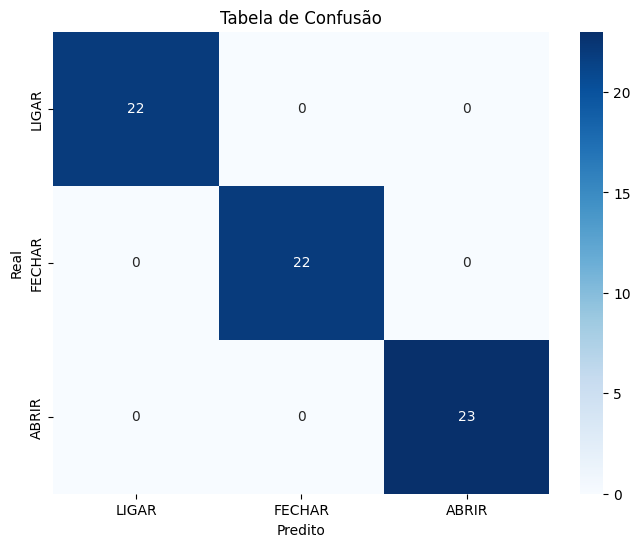

In [297]:
# Armazenando os melhores parâmetros
best_kernel = best_params['kernel']
best_C = best_params['C']
best_gamma = best_params['gamma']

# Treinando o modelo com os melhores parâmetros
y_pred = train_and_predict_one_vs_all(X_train, y_train, X_test, y_test, kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])

# Plotando a tabela de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['LIGAR', 'FECHAR', 'ABRIR'], yticklabels=['LIGAR', 'FECHAR', 'ABRIR'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Tabela de Confusão')
plt.show()

In [298]:
# Gerando e exibindo o relatório de classificação
report = classification_report(y_test, y_pred, target_names=['LIGAR', 'FECHAR', 'ABRIR'], zero_division=0)
print("Relatório de Classificação:")
print(report)

Relatório de Classificação:
              precision    recall  f1-score   support

       LIGAR       1.00      1.00      1.00        22
      FECHAR       1.00      1.00      1.00        22
       ABRIR       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

